In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()

In [2]:
data=pd.read_csv('hypothyroid.csv')

In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [4]:
data.shape

(3772, 30)

In [5]:
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [6]:
for col in data.columns:
    count=data[col][data[col]=='?'].count()
    if count!=0:
        print(col,count)

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [7]:
data.drop(['TBG'],axis=1,inplace=True)

In [8]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,f,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,2.1,t,124,t,1.08,t,114,f,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,1.8,t,112,t,1.07,t,105,f,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,2,t,82,t,0.94,t,87,f,SVI,negative


In [9]:
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis=1,inplace=True)

In [10]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

In [11]:
len(data.columns)

23

In [12]:
for col in data.columns:
    count=data[col][data[col]=='?'].count()
    if count!=0:
        data[col]=data[col].replace('?',np.nan)

In [13]:
for col in data.columns:
    count=data[col][data[col]=='?'].count()
    if count==0:
        print(col,count)

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [14]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [15]:
data['sex']=data['sex'].map({'F':0,'M':1})
for col  in data.columns:
    if len(data[col].unique())==2:
        data[col]=data[col].map({'f':0,'t':1})

In [16]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,1,0,0,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.1,124,1.08,114,SVI,negative
3769,74,0.0,0,0,0,0,0,0,0,0,...,0,0,0,5.1,1.8,112,1.07,105,other,negative
3770,72,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.7,2,82,0.94,87,SVI,negative


In [17]:
data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [18]:
data=pd.get_dummies(data,columns=['referral_source'],drop_first=True)

In [19]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,negative,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,negative,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,negative,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,negative,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,negative,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,negative,0,0,0,1
3768,68,0.0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,negative,0,0,1,0
3769,74,0.0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,negative,0,0,0,1
3770,72,1.0,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,negative,0,0,1,0


In [20]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [21]:
lben=LabelEncoder()
data['Class']=lben.fit_transform(data['Class'])

In [22]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,1,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,1,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,1,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,1,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
3768,68,0.0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,1,0,0,1,0
3769,74,0.0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,1,0,0,0,1
3770,72,1.0,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,1,0,0,1,0


In [23]:
imputer = KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data)
new_data=pd.DataFrame(data=np.round(new_array),columns=data.columns)

In [24]:
new_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.307529,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,4.830594,2.028367,108.542153,1.020944,110.363468,0.974814,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,23.323891,0.786380,35.009868,0.165546,32.275460,0.279508,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

C:\Users\91868\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91868\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91868\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

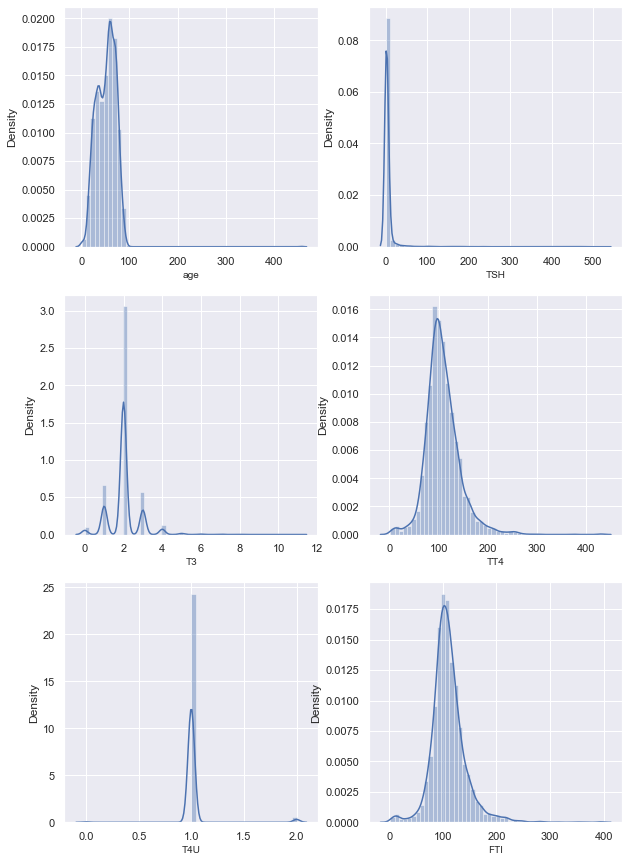

In [26]:
columns=['age','TSH','T3','TT4','T4U','FTI']
plt.figure(figsize=(10,15),facecolor='white')
plotnumber=1
for cols in columns:
    ax=plt.subplot(3,2,plotnumber)
    sns.distplot(new_data[cols])
    plt.xlabel(cols,fontsize=10)
    plotnumber+=1
plt.show()

C:\Users\91868\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91868\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91868\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

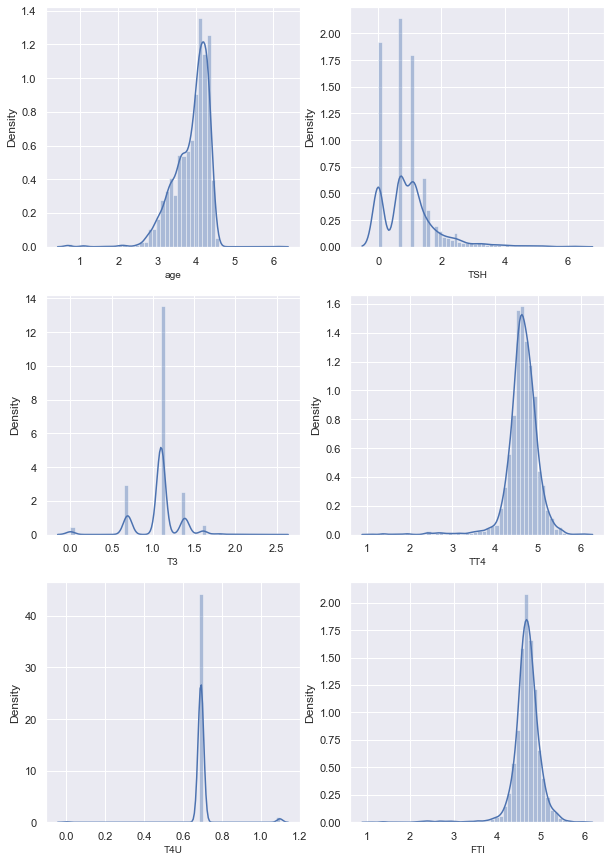

In [27]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [28]:
new_data.drop(['TSH'],axis=1,inplace=True)

In [29]:
new_data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'Class', 'referral_source_SVHC', 'referral_source_SVHD',
       'referral_source_SVI', 'referral_source_other'],
      dtype='object')

C:\Users\91868\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

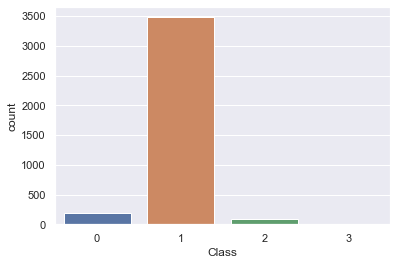

In [30]:
sns.countplot(data['Class'])

In [31]:
data['Class'].value_counts()

1    3481
0     194
2      95
3       2
Name: Class, dtype: int64

In [32]:
x=new_data.drop(['Class'],axis=1)
y=new_data['Class']
rdsm=RandomOverSampler()
x_sampled,y_sampled=rdsm.fit_resample(x,y)

In [33]:
x_sampled.shape

(13924, 24)

In [34]:
y_sampled.shape

(13924,)

In [35]:
x_sampled=pd.DataFrame(data=x_sampled,columns=x.columns)

In [36]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,126.0,2.0,110.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,62.0,2.0,71.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,1.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,1.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,1.0


C:\Users\91868\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

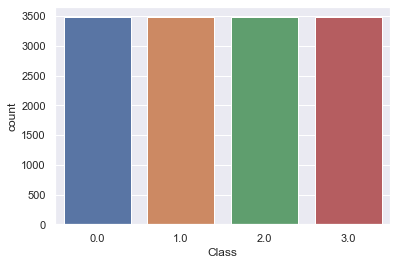

In [37]:
sns.countplot(y_sampled)

In [45]:
#data preprocessing done

<AxesSubplot:>

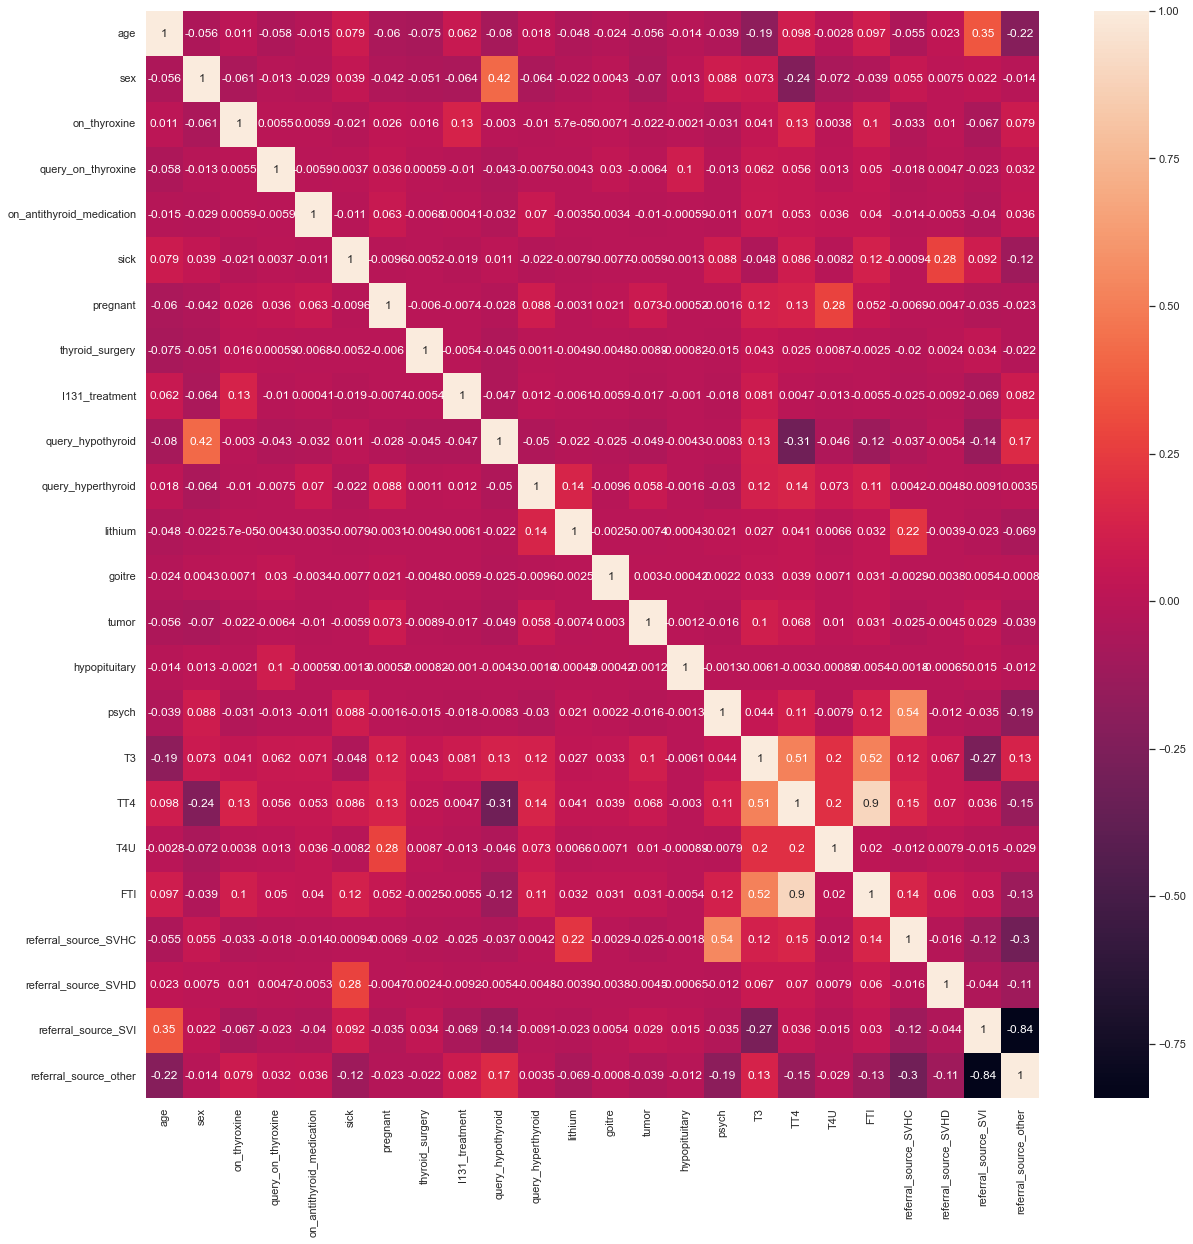

In [38]:
plt.figure(figsize=(20,20)) #plotting the heatmap of size 20 cross 20
sns.heatmap(x_sampled.corr(),annot=True)

## model training

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [49]:
#{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10}-rf
#{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 4, 'p': 2}- knn
#{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}. - xgboost

In [40]:
y_sampled

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13919    3.0
13920    3.0
13921    3.0
13922    3.0
13923    3.0
Name: Class, Length: 13924, dtype: float64

In [41]:
x_sampled.drop(['referral_source_SVHC', 'referral_source_SVHD', 'referral_source_SVI',
       'referral_source_other'],axis=1,inplace=True)

In [42]:
x_sampled.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [43]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=1/3, random_state=42)

In [45]:
x_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
712,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,80.0,2.0,84.0
4279,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,81.0,2.0,79.0
6302,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,119.0,2.0,92.0
8180,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,51.0,2.0,47.0
11263,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,97.0,2.0,91.0
13418,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0
5390,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,107.0,2.0,116.0
860,66.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,169.0,2.0,172.0


In [46]:
y_train

712      1.0
4279     0.0
6302     0.0
8180     2.0
11263    3.0
        ... 
5191     0.0
13418    3.0
5390     0.0
860      1.0
7270     2.0
Name: Class, Length: 9282, dtype: float64

In [61]:
def gridsearch_random_forest(train_x,train_y):
        """ Method Name: get_best_params_for_random_forest
        Description: get the parameters for Random Forest Algorithm which give the best accuracy.Use Hyper Parameter Tuning.
        Output: The model with the best parameters"""
        print('Entered the get_best_params_for_random_forest method of the Model_Finder class')
        # initializing with different combination of parameters
        param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                           "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}
        clf = RandomForestClassifier()
        #Creating an object of the Grid Search class
        grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
        #finding the best parameters
        grid.fit(train_x, train_y)
        #extracting the best parameters
        criterion = grid.best_params_['criterion']
        max_depth = grid.best_params_['max_depth']
        max_features = grid.best_params_['max_features']
        n_estimators = grid.best_params_['n_estimators']
        #creating a new model with the best parameters
        clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                          max_depth=max_depth, max_features=max_features)
        # training the mew model
        clf.fit(train_x, train_y)
        print('Random Forest best params: '+str(f"{grid.best_params_}")+'. Exited the get_best_params_for_random_forest method of the Model_Finder class')
        return clf

In [62]:
def gridsearch_KNN(train_x, train_y):
        """Method Name: get_best_params_for_KNN
        Description: get the parameters for KNN Algorithm which give the best accuracy.
                     Use Hyper Parameter Tuning.
        Output: The model with the best parameters"""
        print('Entered the get_best_params_for_Ensembled_KNN method of the Model_Finder class')
        param_grid_knn = {
                'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : [10,17,24,28,30,35],
                'n_neighbors':[4,5,8,10,11],
                'p':[1,2]
            }

        knn = KNeighborsClassifier()
        #Creating an object of the Grid Search class
        grid = GridSearchCV(knn, param_grid_knn, verbose=3,cv=5)
        # finding the best parameters
        grid.fit(train_x, train_y)
        # extracting the best parameters
        algorithm =grid.best_params_['algorithm']
        leaf_size = grid.best_params_['leaf_size']
        n_neighbors = grid.best_params_['n_neighbors']
        p  = grid.best_params_['p']
        # creating a new model with the best parameters
        knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors,p=p,n_jobs=-1)
        # training the mew model
        knn.fit(train_x, train_y)
        print('KNN best params: ' + str(f"{grid.best_params_}") + '. Exited the KNN method of the Model_Finder class')
        return knn

In [63]:
def get_best_model(train_x,train_y,test_x,test_y):
        print('Entered the get_best_model method of the Model_Finder class')
        knn= gridsearch_KNN(train_x,train_y)
        prediction_knn = knn.predict_proba(test_x) # Predictions using the KNN Model

        if len(test_y.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
            knn_score = accuracy_score(test_y, prediction_knn)
            print('Accuracy for knn:' + str(knn_score))  # Log AUC
        else:
            knn_score = roc_auc_score(test_y, prediction_knn, multi_class='ovr') # AUC for KNN
            print('AUC for knn:' + str(knn_score)) # Log AUC

        # create best model for Random Forest
        random_forest= gridsearch_random_forest(train_x,train_y)
        prediction_random_forest=random_forest.predict_proba(test_x) # prediction using the Random Forest Algorithm

        if len(test_y.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
            random_forest_score = accuracy_score((test_y),prediction_random_forest)
            print('Accuracy for RF:' + str(random_forest_score))
        else:
            random_forest_score = roc_auc_score((test_y), prediction_random_forest,multi_class='ovr') # AUC for Random Forest
            print('AUC for RF:' + str(random_forest_score))

        #comparing the two models
        if(random_forest_score <  knn_score):
            return 'KNN', knn
        else:
            return 'RandomForest', random_forest

In [64]:
best_model_name , best_model  = get_best_model(x_train,y_train,x_test,y_test)

Entered the get_best_model method of the Model_Finder class
Entered the get_best_params_for_Ensembled_KNN method of the Model_Finder class
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.949 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.935 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.940 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.949 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.949 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.936 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.942 total time=   0.1

[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.905 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.904 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.904 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.908 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.905 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.905 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.903 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.899 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.906 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.908 total tim

[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1;, score=0.941 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1;, score=0.939 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1;, score=0.949 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.947 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.935 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.941 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.943 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.951 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.915 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.913 total time=   0.1s


[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.905 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.903 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.901 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.901 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.909 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.949 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.938 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.939 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.949 total time=   

[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2;, score=0.923 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.905 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.908 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.902 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.907 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.909 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.904 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.904 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.898 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.906 total time=   0.0s
[CV 5/5] EN

[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1;, score=0.938 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1;, score=0.949 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.947 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.935 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.943 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.951 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.915 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.916 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.916 total time=   0.1s
[CV 4/5] END algorit

[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2;, score=0.899 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2;, score=0.902 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2;, score=0.910 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.949 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.937 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.940 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.936 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.948 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.948 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.936 total time=   0.1s
[CV 3/5] END algo

[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.908 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.902 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.907 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.908 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.904 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.904 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.906 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.908 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.904 total time=   0.0s
[CV 2/5] E

[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.943 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.952 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.917 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.914 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.909 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.918 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.923 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.918 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.914 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=

[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.936 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.933 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.945 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.949 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.936 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.943 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.952 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.943 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.937 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=

[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=10, p=2;, score=0.906 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=10, p=2;, score=0.908 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.906 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.906 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.905 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.903 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.907 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.905 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.902 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.901 total time=   0.1s
[CV 4/5] END algorithm=brute, 

C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.742 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.765 total time=   0.0s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.799 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.801 total time=   0.2s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.812 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.796 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.803 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.803 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.797 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.771 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.792 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.787 total time=   0.5s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.809 total time=   0.5s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.797 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.768 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.810 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.646 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.746 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.782 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.780 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.803 total time=   0.1s
[CV 4/5] 

C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=10;, score=0.808 total time=   0.0s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.840 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.840 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.832 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.817 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.835 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.840 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.836 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.839 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.814 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.843 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.834 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.834 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.834 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.818 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.842 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.834 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.818 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.825 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.832 total time=   0.1s
[CV 4/5] 

C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.727 total time=   0.0s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.802 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.795 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.820 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.803 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.802 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.795 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.825 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.794 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.795 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.794 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.791 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.803 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.783 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.797 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.805 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.809 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.819 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.828 t

C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=10;, score=0.813 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.842 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.850 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.839 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.815 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.839 total time=   0.1s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.840 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.844 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.845 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.830 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.843 total time=   0.3s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.840 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.844 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.846 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.824 total time=   0.4s


C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.836 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.838 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.843 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.846 t

C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91868\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest best params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}. Exited the get_best_params_for_random_forest method of the Model_Finder class
AUC for RF:0.9576819167909485


In [65]:
'''Random Forest best params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}. 
Exited the get_best_params_for_random_forest method of the Model_Finder class
AUC for RF:0.9576819167909485
KNN best params: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 4, 'p': 2}. 
Exited the KNN method of the Model_Finder class
AUC for knn:0.9864854651972423'''

"Random Forest best params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}. \nExited the get_best_params_for_random_forest method of the Model_Finder class\nAUC for RF:0.9576819167909485\nKNN best params: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 4, 'p': 2}. \nExited the KNN method of the Model_Finder class\nAUC for knn:0.9864854651972423"

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfcls=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_features='sqrt',random_state=42)

In [53]:
from sklearn.metrics import f1_score
rfcls.fit(x_train,y_train)
y_pred=rfcls.predict(x_test)
f1_score(y_test, y_pred, average='weighted')

0.8315978500065638

In [57]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
print(precision_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))
confusion_matrix(y_test,y_pred)

0.8343247257119747
0.8311072813442482


array([[ 771,  424,    0,    0],
       [ 287,  855,   17,    3],
       [  19,   25, 1083,    9],
       [   0,    0,    0, 1149]], dtype=int64)

In [109]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracy=cross_val_score(rfcls,x_train,y_train,cv=3,scoring='accuracy')

In [110]:
accuracy

array([0.84809308, 0.83419522, 0.83031674])

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knncls=KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, n_neighbors=4, p=2)

In [59]:
from sklearn.metrics import f1_score
knncls.fit(x_train,y_train)
y_pred=knncls.predict(x_test)
f1_score(y_test, y_pred, average='weighted')

0.9465374302083336

In [60]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
print(precision_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))
confusion_matrix(y_test,y_pred)

0.9554703235243759
0.9474364498061181


array([[1195,    0,    0,    0],
       [ 230,  918,   14,    0],
       [   0,    0, 1136,    0],
       [   0,    0,    0, 1149]], dtype=int64)